## Voting Classifier
#### The idea of a voting classifier is that we can give it a list of estimators and we can also give it a weightf for each estimator, which can make us say we want this estimator to be weighted twice as heavily as another. The nice thing about this is that we can use this weight in our grid search i.e we can let the grid search determine the best weight to balance different models for our dataset

In [1]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import make_classification

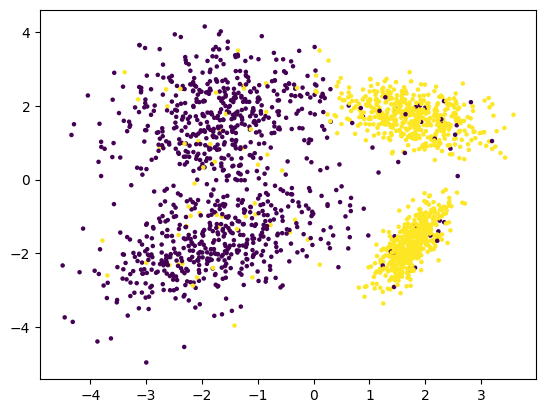

In [8]:
X, y = make_classification(n_samples=2000, n_features=2, n_redundant=0, random_state=21, class_sep=1.75, flip_y=0.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=5);

In [12]:
clf1 = LogisticRegression().fit(X, y)
clf2 = KNeighborsClassifier(n_neighbors=10).fit(X, y)
# Soft voting means we are averaging the soft proba values
clf3 = VotingClassifier(estimators=[('clf1', clf1), ('clf2', clf2)],
                       voting='soft',
                       weights=[0.5, 0.5])
clf3.fit(X, y)

VotingClassifier(estimators=[('clf1', LogisticRegression()),
                             ('clf2', KNeighborsClassifier(n_neighbors=10))],
                 voting='soft', weights=[0.5, 0.5])